# Homework 3  
## Regression models

# <p style="text-align: right;"> &#9989; Alexa Wiker</p>
# <p style="text-align: right;"> &#9989; alexawiker359</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression
* Creating a project timeline

**This assignment is due by 11:59 pm on Friday, November 7th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 90 standard points possible in this assignment, including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
<a id="toc"></a>

## Table of contents

* [Part 1: Git branch](#part1) (6 points)

* [Part 2: Loading the datasets](#part2) (9 points)

* [Part 3: Simple linear regression](#part3) (17 points)

* [Part 4: Multiple regression](#part4) (27 points)

* [Part 5: Logistic regression](#part5) (22 points)

* [Part 6: Project planning](#part6) (5 points)

* [Part 7: Assignment wrap-up](#part7) (4 points)


##### Run this cell below before moving on:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


sns.set_context("talk")

---
[Back to ToC](#toc)
<a name="part1"></a>
# Part 1: Git Branch (6 points) 


You're going to add this assignment to the `cmse202-f25-turnin` repository you created so that you can track your progress on the assignment and preserve the final version that you turn in. You will do this by performing the tasks 1.1 - 1.6 below.

**Important**: Double-check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the HW01 assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f25-turnin` **local** repository and create a new directory called `hw-03`. In the cell below put the command(s) you used to do this.

<font size=6 color="#009600">&#9998;</font> cd cmse202-f25-turnin, mkdir hw-03

**&#9989; Question 1.2 (1 point)**: Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet. Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> mv ~/CMSE202/Code/Notebooks/Homeworks/HW-03_Regression-F25-STUDENT.ipynb ~/CMSE202-f25-turnin/hw-03

**&#9989; Question 1.3 (1 point)**: Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this). Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> git branch hw03_branch

**&#9989; Question 1.4 (1 point)**: "Check out" the new branch (so that you'll be working on that branch). Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> git checkout hw03_branch

**&#9989; Question 1.5 (1 point)**:  Double check to make sure you are actually on that branch. Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> git branch

**&#9989; Question 1.6 (1 point)**: Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub. Put the command(s) you used to do this in the cell below.

<font size=6 color="#009600">&#9998;</font> git add HW-03_Regression-F25-STUDENT.ipynb
git commit -m "Adding notebook"
git push origin hw03_branch

---
If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f25-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

&#9989; **Do this:  Remember to do every Git commit/push mentioned throughout the assignment!**


---
[Back to ToC](#toc)
<a name="part2"></a>
# Part 2: Loading the dataset. (9 points)

In this section, you will work with data from the [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) dataset. The dataset includes all block groups in California from the 1990 Census. On average, each block group contains approximately 1,425.5 individuals residing in a geographically compact area. As expected, the size of each area varies inversely with population density. Distances between block group centroids are calculated using latitude and longitude coordinates. Block groups with zero values for either the independent or dependent variables were excluded from the analysis. The final dataset consists of 20,640 observations across 9 variables.

Our goal is to use ordinary least squares to design regression models to fit the median house value in a California census district, given eight features. We will examine a simple linear model using all the provided features, a reduced linear model that only uses a subset of the features, and a multiple regression model.

<u>Reference:</u> Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297. 

&#9989;  **Question 2.1 (1 points)**: **Do This:** Download the file `housing.csv` from the link below, and save it into the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv`

``` bash
curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv
```

&#9989;  **Question 2.2 (2 points)**: Next, load the data using Pandas and display the first **20** rows.

In [3]:
import pandas as pd
df = pd.read_csv('housing.csv')
df.head(20)

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,4.761658,1.103627,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,4.931907,0.951362,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,4.797527,1.061824,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,4.294118,1.117647,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,4.970588,0.990196,1551,714,3.6912,261100,NEAR BAY


<font color = blue > You should notice that the DataFrame has a non-numerical feature called "ocean_proximity". There are also a few rows with `NaN` values, although you may not see them in the few rows that were displayed. We will not use the "ocean_proximity" column or any of the rows with `NaN` values in this assignment. </font>

&#9989;  **Question 2.3 (2 points)**: **Do This:** **Drop the "ocean_proximity" column from the dataframe, and drop all the rows with `NaN` values.**

In [4]:
df_new = df.drop(columns='ocean_proximity')
df_cleaned = df_new.dropna()
df_cleaned.head()

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200


&#9989;  **Question 2.4 (2 points)**: How many rows did you end up dropping from this data set? What total percentage of data was removed?

In [5]:
# Asked Claude, Accessed 10/30/2025
#Prompt: How do I calculate the number of rows dropped from a data set?

original_shape = df.shape
original_rows = original_shape[0]

# Drop NaN values
df_cleaned = df.dropna()

# Get new shape
new_shape = df_cleaned.shape
new_rows = new_shape[0]

# Calculate rows dropped and percentage
rows_dropped = original_rows - new_rows
percentage_dropped = (rows_dropped / original_rows) * 100

print("Rows dropped = ", rows_dropped)
print("Percentage dropped = ",percentage_dropped)

Rows dropped =  207
Percentage dropped =  1.002906976744186


&#9989;  **Question 2.5 (2 points)**: Look at the [Kaggle website](https://www.kaggle.com/datasets/camnugent/california-housing-price) for this dataset is hosted on Kaggle. What do the columns `longitude` and `latitude` represent?

<font size=6 color="#009600">&#9998;</font> The link to the data set did not work for me, but I'm guessing that the longitude and latitude columns contains coordinates that represent the locations of the houses.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---
<a name="part3"></a>
[Back to ToC](#toc)

# Part 3: One Variable Linear Regression (17 points)

In this part, we'll perform some one-variable linear regression analysis on the California Housing dataset we just downloaded.

 &#9989; **Question 3.1 (4 points)**: Using the `OLS()` method in `statsmodels.api`, make a simple linear regression model that predicts "median_house_value" using "median_income" as the independent variable. Be sure to use the `add_constant()` method to add a column of ones to the DataFrame before using the `OLS()` method so that your linear model includes a constant term.

In [6]:
x = df_cleaned[['median_income']]
y = df_cleaned['median_house_value']

# Add a constant term to the independent variable
X = sm.add_constant(x)

# Create and fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 1.840e+04
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:07:20   Log-Likelihood:            -2.6061e+05
No. Observations:               20433   AIC:                         5.212e+05
Df Residuals:                   20431   BIC:                         5.212e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.491e+04   1329.965     33.765

&#9989; **Question 3.2 (2 points):** Comment on the fit of your model. What are you using to judge the fit?

<font size=+3>&#9998;</font>  I am using the R-squared, which is 0.474. This means that about 47.4% of the variation in median_house_value is explained by median_income. It's not a super strong relationship, but it does suggest that there is a meaningful relationship.  F-statistic and p-value (Prob > F = 0.000). The model as a whole is statistically significant, meaning there is strong evidence that median_income helps explain differences in median_house_value.

&#9989; **Question 3.3 (4 points):** Plot the scatter plot of your independent and dependent data and also plot the line predicted by the regression. Include descriptive labels, titles, and legends as appropriate.

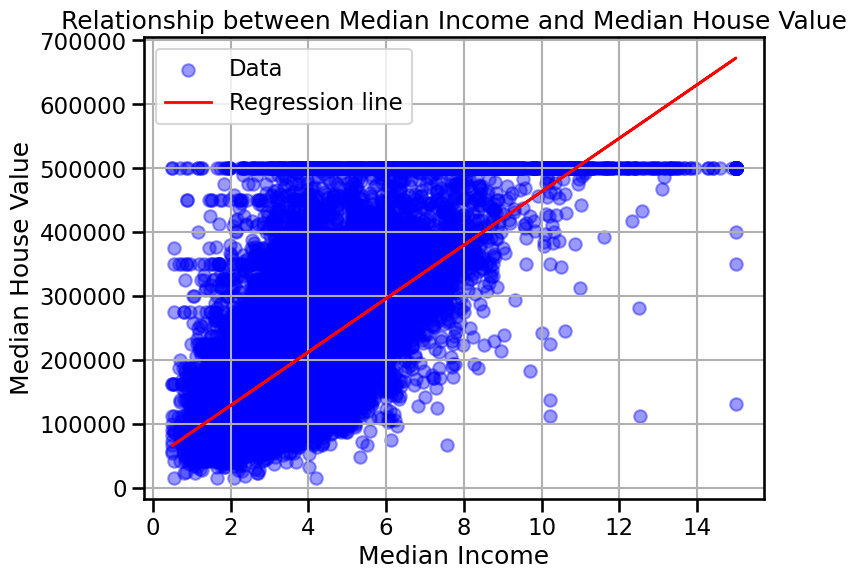

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = df_cleaned["median_income"]
y = df_cleaned["median_house_value"]

y_prediction = model.predict() 

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.4, label="Data", color='blue')
plt.plot(x, y_prediction, color='red', linewidth=2, label="Regression line")

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Relationship between Median Income and Median House Value")
plt.legend()
plt.grid(True)
plt.show()

&#9989; **Question 3.3 (2 points):** From your plot, you will notice that the dataset includes a lot of entires with a median housing value of \$500,000. Let us investigate if this affects our regression analysis or not. 

**Do this:** Now mask the housing dataset to exclude all data points with a median house value of at least $500,000. 

In [8]:
filtered_df = df_cleaned[df_cleaned["median_house_value"] < 500000]

&#9989; **Question 3.4 (4 points):** Now make a simple linear regression model that predicts "median_house_value" using "median_income" as the independent variable, on this new data subset. Be sure to use the `add_constant()` method to include a constant term in your model.

In [9]:
X = filtered_df["median_income"]   
y = filtered_df["median_house_value"] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.399e+04
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:07:33   Log-Likelihood:            -2.4565e+05
No. Observations:               19448   AIC:                         4.913e+05
Df Residuals:                   19446   BIC:                         4.913e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.49e+04   1352.286     33.203

&#9989; **Question 3.5 (4 points):** Make a scatter plot of your independent and dependent data, and also plot the line predicted by the new regression model above. Include descriptive labels, titles, and legends as appropriate.

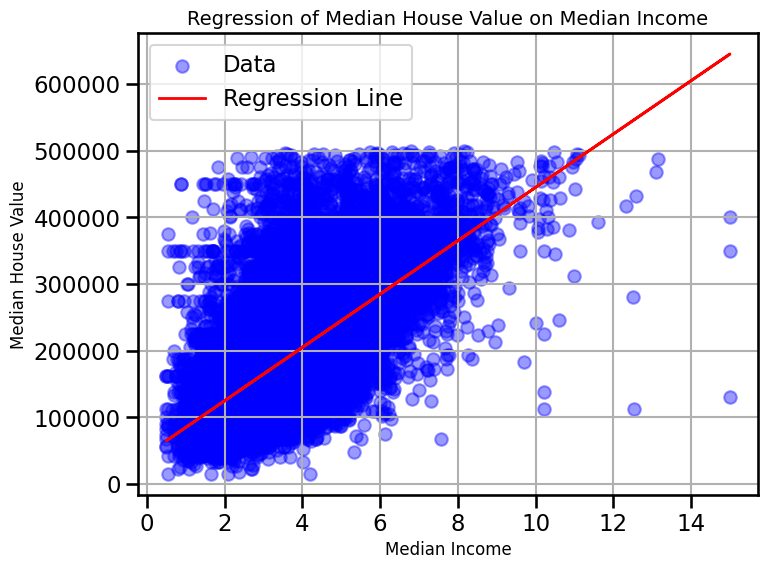

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

x = filtered_df["median_income"]
y = filtered_df["median_house_value"]

x_constant = sm.add_constant(X)
model = sm.OLS(y, x_constant).fit()

y_prediction = model.predict(x_constant)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.4, color='blue', label='Data')
plt.plot(x, y_prediction, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Median Income", fontsize=12)
plt.ylabel("Median House Value", fontsize=12)
plt.title("Regression of Median House Value on Median Income", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

&#9989; **Question 3.6 (1 point):** Comment on the fit of your last model. What are you using to judge the fit?

<font size=+3>&#9998;</font> The R-squared value is 0.418. This means that about 41.8% of the variation in median house value is explained by median income. This means that there is a meaningful relationship, but it's not super strong.

The p-value is 0.000. This means that the model is statistically significant, so median_income is an important predictor of housing value.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---
<a name="part4"></a>
[Back to ToC](#toc)


# Part 4: Multiple Regression (27 points)
In this part, we will explore multivariable regression on the same California Housing dataset from part 3. Reload the dataset that includes median house values of $500,000.

&#9989; **Question 4.1 (5 points)**: Using the `OLS()` method in `statsmodels.api`, make a multiple regression model that predicts "median_house_value" using the other variables, and display the `.summary()` of that process. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = k+ax_1 + bx_2 +... +hx_8$, with $k$ constant, to the data instead of a line through the origin $y = ax_1 + bx_2 +... +hx_8$. 

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

df = pd.read_csv('housing.csv')
df_new = df.drop(columns='ocean_proximity')
df_cleaned = df_new.dropna()

X = df_cleaned.drop('median_house_value', axis=1)
y = df_cleaned['median_house_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4514.
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:07:53   Log-Likelihood:            -2.5677e+05
No. Observations:               20433   AIC:                         5.136e+05
Df Residuals:                   20424   BIC:                         5.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.558e+06   6.35

&#9989;  **Question 4.2 (4 points)**: Answer the following two questions: 

1. What is the R-squared value you got? 

2. Based on your R-squared value, what does it tell you about the regression fit, and how the model fits the data?

<font size=+3>&#9998;</font> 1. The R^2 value is 0.639.
2. This is higher than the previous R^2, which means that this model is a better fit than the previous model. My regression model explains about 63.9% of the variance in the median house values. The model is a pretty good fit.

&#9989;  **Question 4.3 (2 points)**: 
Based on the output of the OLS summary, which of these features (variables) appears to be "significant" in predicting the "median_house_value"?

<font size=+3>&#9998;</font> All of the features appear to be significant in predicting the median house value. Each feature has a p > |t| value of 0, meaning that it is statistically significant.

&#9989;  **Question 4.4 (4 points)**: In the output of the OLS summary, you should have seen a note that says something like 

"_The condition number is large, [[number]]. This might indicate that there are strong multicollinearity or other numerical problems._" 

Multicollinearity is a statistical phenomenon where some of the features in a model can be linearly predicted using some of the other features in the model. In other words, the features in the model are somewhat redundant. Hence, even if each feature may be deemed significant, it may still be possible to form a "reduced" model using a smaller number of features. 

---
**Do This:** Design a second linear model that uses only **three** of the eight variables to predict the "median_house_value", and fits the data comparably well as the first linear model you designed in Question 4.2. You can choose this subset either by trial and error or by any other method you'd like.

In [12]:
x_reduced = df_cleaned[['median_income', 'population', 'latitude']]
y = df_cleaned['median_house_value']

x_reduced = sm.add_constant(x_reduced)

reduced_model = sm.OLS(y, x_reduced).fit()

print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     6374.
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:07:55   Log-Likelihood:            -2.6042e+05
No. Observations:               20433   AIC:                         5.208e+05
Df Residuals:                   20429   BIC:                         5.209e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.346e+05   1.01e+04     23.323

&#9989;  **Question 4.5 (2 points)**: How did your reduced linear model fit the data compared to the full linear model you created in Question 4.1? Give some quantitative justification for this answer.

<font size=+3>&#9998;</font> The full linear model fits the data better than the reduced linear model. The reduced linear model has an R^2 value of 0.483. The full linear model has an R^2 value of 0.639.


&#9989;  **Question 4.6 (5 points)**: Now that you have your reduced model, make a heat map showing the correlations between the different variables (similar to what we did on Day 14). Be sure to include a legend!

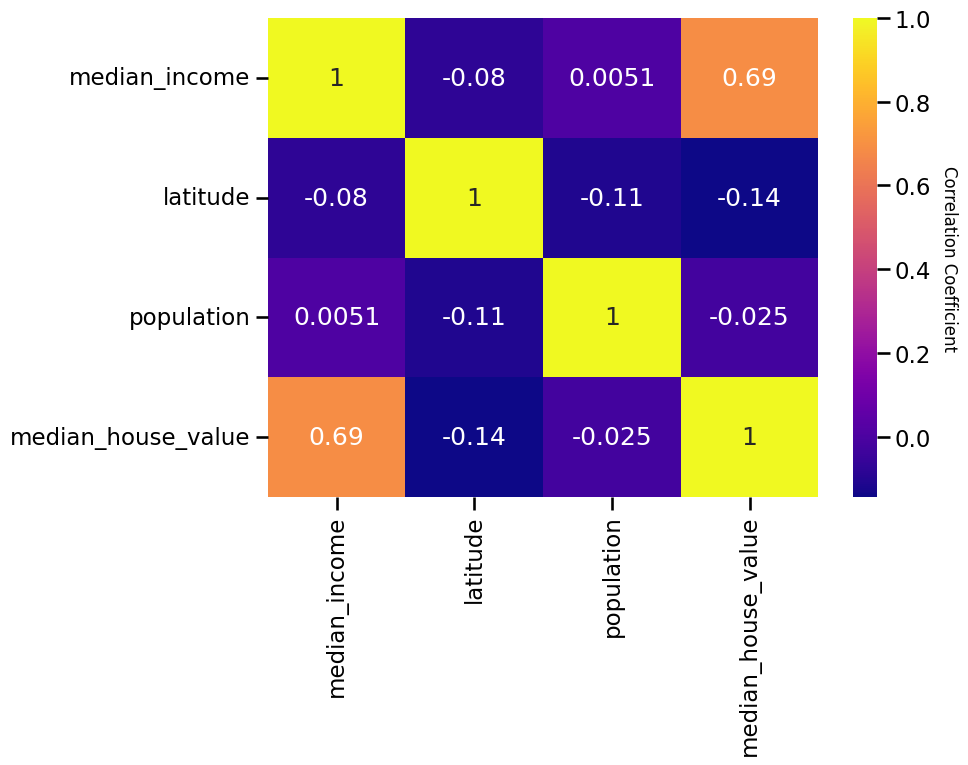

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

reduced_vars = ['median_income', 'latitude', 'population', 'median_house_value']
df_reduced = df_cleaned[reduced_vars]

corr_matrix = df_reduced.corr()

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(corr_matrix, annot=True, cmap='plasma')                  

cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20, fontsize=12)

plt.tight_layout()

plt.show()

&#9989;  **Question 4.7 (1 point)**: You should find that there isn’t much overlap between the high-correlation variables in the heat map and the variables you used in your (reduced)  model, the opposite of what we found on Day 14. Explain why this is the case.

<font size=+3>&#9998;</font> 
I picked variables that covered different aspects of what influences house prices, so those might not be the ones with the strongest correlation in the heatmap.

&#9989;  **Question 4.8 (3 points)**: Create three `.graphics.plot_regress_exog` figures, each one using one of the three features in your reduced model as the independent variable, to examine the fit to the data. Pay attention to the top two plots in each instance: the fitted values figure and the residual plot. 

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_regress_exog

x_reduced = df_cleaned[['median_income', 'latitude', 'population']]
y = df_cleaned['median_house_value']

x_reduced = sm.add_constant(x_reduced)

model = sm.OLS(y, x_reduced).fit()

plt.figure(figsize=(15, 20))

fig = plt.figure(figsize=(12, 8))
plot_regress_exog(model, 'median_income', fig=fig)
plt.tight_layout()
plt.savefig('median_income_regression.png')
plt.close()

fig = plt.figure(figsize=(12, 8))
plot_regress_exog(model, 'latitude', fig=fig)
plt.tight_layout()
plt.savefig('latitude_regression.png')
plt.close()

fig = plt.figure(figsize=(12, 8))
plot_regress_exog(model, 'population', fig=fig)
plt.tight_layout()
plt.savefig('population_regression.png')
plt.close()

<Figure size 1500x2000 with 0 Axes>

&#9989;  **Question 4.9 (1 point)**: Now use some online resource to help you make sense of these residual plots. Describe the trends that you see. Be as detailed as possible. Is there heteroscedasticity? Is there constant variance? Are there any signs of non-linearity? These are a few questions you might ask yourself or try to answer to make sense of the residual plots.

<font size=+3>&#9998;</font> _Put your explanations here._

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---
<a name="part5"></a>
[Back to ToC](#toc)

## Part 5. Logistic Regression (22 points)

In this part of the homework, you will work with data from an unknown source. Our goal is to use logistic regression to identify who is more likely to buy merchandise from ads on social networks.

&#9989;  **Question 5.1 (3 points)**: **Do This:**

1. Download the dataset and write the command you used in the next cell

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv`
    
2. Load the data in this file into a `Pandas` dataframe
3. Display the first **five** rows of the dataframe. 

In [17]:
curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv

SyntaxError: invalid syntax (1297048148.py, line 1)

In [18]:
dataframe = pd.read_csv('ads.csv')
dataframe.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


As you can see the dataset has only few columns. The first columns is not useful since it is a unique identifier. The second column could be useful, however, we need numbers instead of strings. Hence we are left only with the last three columns. `Age` and `EstimatedSalary` will be our features while `Purchased` will be our labels 

&#9989;  **Question 5.2 (3 points)**: 

1. **Do This:** Drop the first and second columns of the dataset    
2. **Do This:** Divided the rest of the dataset into a train and a test dataset using `train_test_split` function of `scikit-learn`. The test dataset should be 25% of the original data


In [21]:
df_new = dataframe.drop(['User ID', 'Gender'], axis=1)

x = df_new.drop('Purchased', axis=1) 
y = df_new['Purchased'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

&#9989;  **Question 5.3 (4 points)**: 

1. **Do This:** Use the `Logit` class to perform Logistic regression on your training dataset (don't forget to add the constant).
2. **Do This:** Print the results of your model


In [22]:
x_train_const = sm.add_constant(x_train)

logit_model = sm.Logit(y_train, x_train_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.374943
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.4227
Time:                        18:27:39   Log-Likelihood:                -112.48
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.699e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.1261      1.313     -8.475      0.000     -13.699      -8.553
Age           

&#9989;  **Question 5.4 (2 points)**: Do you think this is a good fit? Explain your answer


<font size=+3>&#9998;</font> Yes, I think this is a good fit. The p values are 0.000, meaning they are statistically significant in predicting if someone will make a purchase.

&#9989;  **Question 5.5 (4 points)**: Use the above model to make predictions on the test dataset. Remember that the `Logit` model returns continuous values from 0 to 1 while you need two discrete values. Then use the function `accuracy_score` from `scikit-learn` to see how good your model is.

In [24]:
from sklearn.metrics import accuracy_score

x_test_const = sm.add_constant(x_test)

y_pred_prob = result.predict(x_test_const)

y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.88


&#9989;  **Question 5.6 (1 point)**: Does the accuracy score change your opinion of the goodness of your model?


<font size=+3>&#9998;</font> No, I thought that the model was good. 0.88 is a good accuracy score.

&#9989;  **Question 5.7 (5 points)**: Does your model improve if you re-introduce the `Gender` column? Since the column is made of strings, replace `Male` with 0 and `Female` with 1. Is `Gender` an informative feature?
Explain your answers.

In [25]:
df_with_gender = dataframe.drop(['User ID'], axis=1)

df_with_gender['Gender'] = df_with_gender['Gender'].replace({'Male': 0, 'Female': 1})

x = df_with_gender.drop('Purchased', axis=1) 
y = df_with_gender['Purchased'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train_const = sm.add_constant(x_train)

logit_model_gender = sm.Logit(y_train, x_train_const)
result_gender = logit_model_gender.fit()

print(result_gender.summary())

x_test_const = sm.add_constant(x_test)
y_pred_proba = result_gender.predict(x_test_const)
y_pred = (y_pred_proba >= 0.5).astype(int)

accuracy_with_gender = accuracy_score(y_test, y_pred)

print(accuracy_with_gender)

Optimization terminated successfully.
         Current function value: 0.374322
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.4237
Time:                        18:36:19   Log-Likelihood:                -112.30
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.455e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.1169      1.318     -8.435      0.000     -13.700      -8.534
Gender        

/tmp/ipykernel_2038505/357502311.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_with_gender['Gender'] = df_with_gender['Gender'].replace({'Male': 0, 'Female': 1})


<font size=+3>&#9998;</font> No, gender is not an informative feature because it's p value is greater than .5, meaning gender is not statistically significant. Also, the accuracy score stayed at 88%, meaning that gender did not improve or impact the model's performance.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---
[Back to ToC](#toc)

<a name="part5"></a>
## Part 6. Setting a project timeline. (5 points)

You should know which project you will be working on with your group by now. You and your group will be presenting this project during the last week of class (November 24th-December 2nd).  Come up with a project timeline with specific goals/checkpoints to meet as this deadline approaches.  The ability to set project timelines is a very useful skill to have professionally. You can create this timeline yourself, as a group, or you may ask generative AI to try and make a timeline for you. Try to, in the very least, create weekly checkpoints (~3).

<font size=+3>&#9998;</font> My group is meeting every Sunday, so every Sunday is the deadline for each of these weeks.
Week 1: Come up with a basis and plan for our project. Find data sets and make a general outline of the direction we want hte project to take.
Week 2: Have working code and a working notebook. It doesn't have to be perfect, but we should have most of our code in there
Week 3: Finalize our code and add the finishing touches. Everything should be working correctly. Create and finalize the project presentation slides.

---
<a name="conclusion"></a>
[Back to ToC](#toc)

## Part 7: Assignment wrap-up (4 points)


**7.1:** (1 point) Have you put **your name** and **GitHub username** at the top of your notebook?

**7.2:** (3 points) Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

1. Switch back to your `main` branch. 
2. Merge your `hw03_branch` with your `main` branch. 
3. Finally, push the changes to GitHub.

**NOTE:** The grader will be able to see your commit messages and whether you pushed the repo at this stage, if everything has gone as planned. Double-check that things look correct on **GitHub** before you submit this notebook to **D2L**.

---
## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University